In [1]:
#Primero, vamos a importar las librerías pertinentes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Revisemos los datos para el proyecto de housing
df = pd.read_csv('USA_Housing.csv')
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
pd.options.display.float_format = '{:,.2f}'.format
df.describe()
#Podemos estudiar brevemente el coeficiente de variabilidad, que es la relación entre la desviación estándar y la media
#Considerar la renormalización

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count          5,000.00             5,000.00                   5,000.00   
mean          68,583.11                 5.98                       6.99   
std           10,657.99                 0.99                       1.01   
min           17,796.63                 2.64                       3.24   
25%           61,480.56                 5.32                       6.30   
50%           68,804.29                 5.97                       7.00   
75%           75,783.34                 6.65                       7.67   
max          107,701.75                 9.52                      10.76   

       Avg. Area Number of Bedrooms  Area Population        Price  
count                      5,000.00         5,000.00     5,000.00  
mean                           3.98        36,163.52 1,232,072.65  
std                            1.23         9,925.65   353,117.63  
min                            2.00           172.61    15,938.66  
25%                            3.14        29,403.93   997,577.14  
50%                            4.05        36,199.41 1,232,669.38  
75%                            4.49        42,861.29 1,471,210.20  
max                            6.50        69,621.71 2,469,065.59

In [6]:
#Tip 1: revisar que std < mean/2
#Tip 2: revisar que max < mean/2

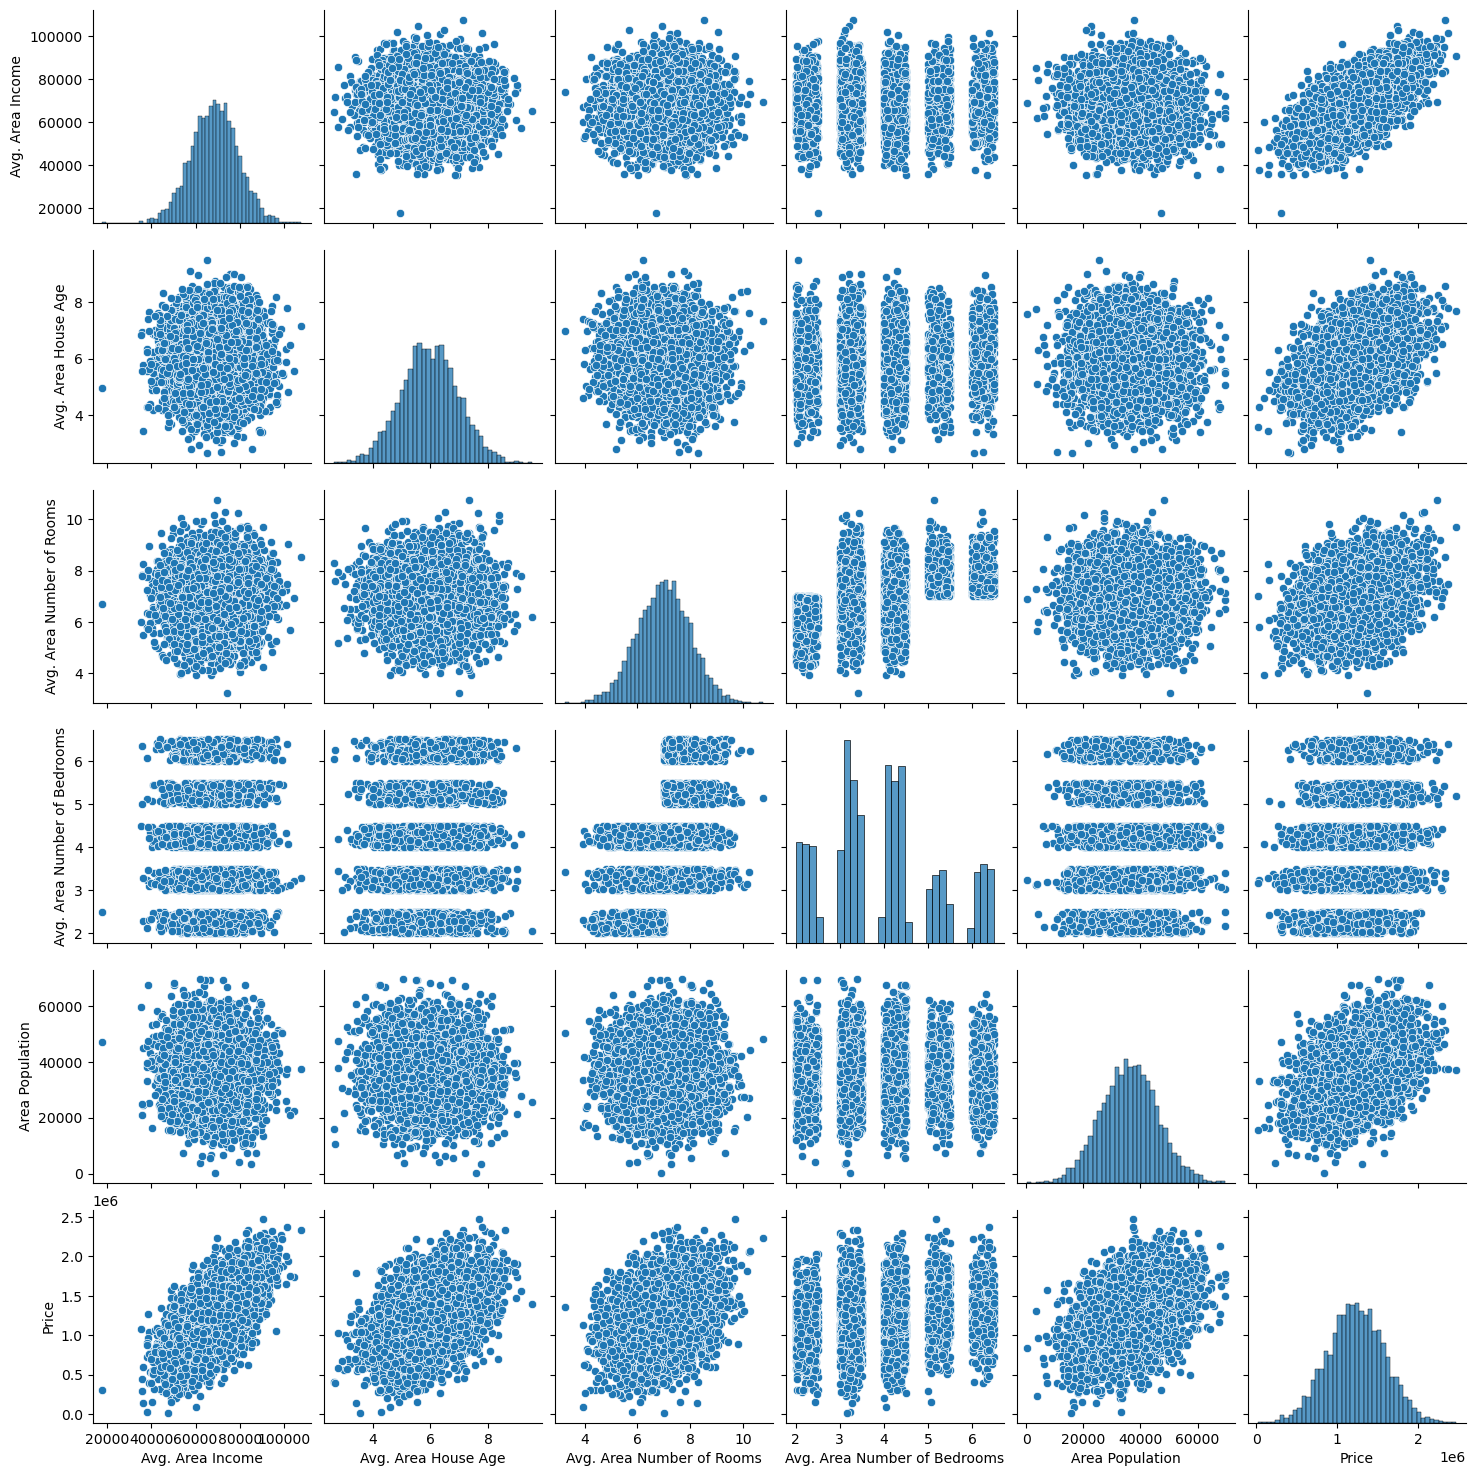

In [7]:
#Hagamos un pairplot para estudiar relaciones entre las variables, y verificar los supuestos del modelo de regresión
sns.pairplot(df)

C:\Users\jeanp\AppData\Local\Temp\ipykernel_18160\1500254741.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True, cmap = 'Greens')


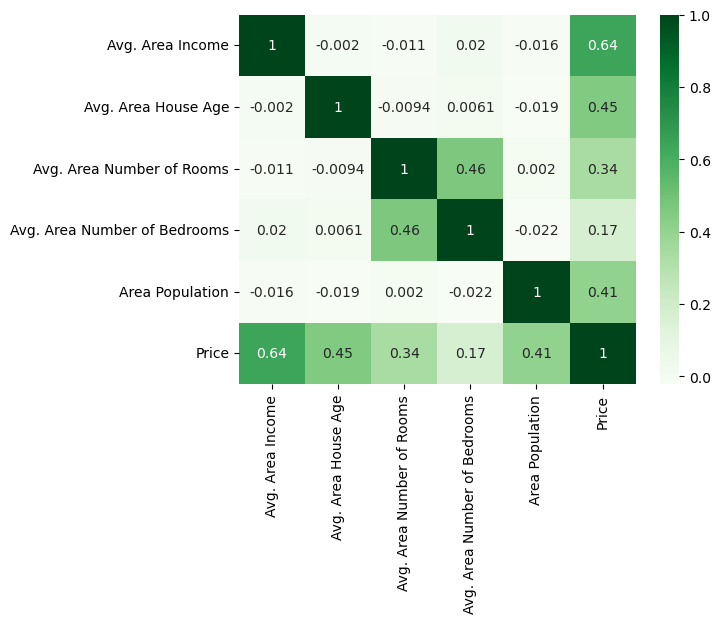

In [8]:
sns.heatmap(df.corr(),annot = True, cmap = 'Greens')
plt.show()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [10]:
df['Address'].nunique()

5000

In [11]:
#Estas son las matrices de características y la matriz objetivo
X = df.drop(columns = ['Price','Address'])
y = df['Price']

In [12]:
#Ahora, importemos el módulo de preprocesamiento de la librería sklearn
from sklearn.model_selection import train_test_split


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [14]:
X_train.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
1840         55,245.34                 3.97                       8.96   
2115         62,305.64                 6.49                       7.65   
4437         77,345.47                 5.41                       8.24   
1146         65,846.17                 6.39                       6.80   
2486         69,350.79                 6.91                       8.29   

      Avg. Area Number of Bedrooms  Area Population  
1840                          4.38        43,557.94  
2115                          3.19        47,066.62  
4437                          3.11        26,706.91  
1146                          3.18        28,214.36  
2486                          4.29        36,779.06

In [15]:
y_train.head()

1840     881,446.12
2115   1,375,771.13
4437   1,137,069.31
1146     928,950.00
2486   1,392,083.82
Name: Price, dtype: float64

In [16]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1501 to 1912
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              1500 non-null   float64
 1   Avg. Area House Age           1500 non-null   float64
 2   Avg. Area Number of Rooms     1500 non-null   float64
 3   Avg. Area Number of Bedrooms  1500 non-null   float64
 4   Area Population               1500 non-null   float64
dtypes: float64(5)
memory usage: 70.3 KB


In [17]:
#Ahora podemos crear y entrenar el modelo de regresión lineal
#Vamos a importar nuestro modelo
from sklearn.linear_model import LinearRegression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
#Una vez que el modelo esté entrenado, procedemos a evaluarlo:
model.intercept_

-2638673.4261913267

In [21]:
model.coef_

array([2.16257989e+01, 1.65590393e+05, 1.19827783e+05, 2.36109526e+03,
       1.52165814e+01])

In [22]:
df_coef = pd.DataFrame(model.coef_, index = X.columns, columns = ['Coeficientes'])
df_coef

Coeficientes
Avg. Area Income                     21.63
Avg. Area House Age             165,590.39
Avg. Area Number of Rooms       119,827.78
Avg. Area Number of Bedrooms      2,361.10
Area Population                      15.22

In [23]:
y_pred = model.predict(X_test)

In [24]:
y_pred

array([1308536.13592621, 1237122.72746477, 1243835.62817067, ...,
       1457119.79297243, 1483428.9530937 , 1047510.59737177])

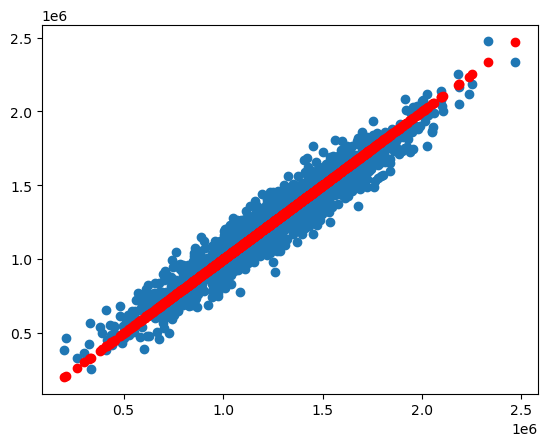

In [26]:
#Revisemos la heterocedasticidad (diferencia entre las predicciones y los valores reales)
plt.scatter(y_test, y_pred)
plt.scatter(y_test,y_test, color = 'r') #Buen truco para generar la línea recta y=x

<Axes: xlabel='Price', ylabel='Count'>

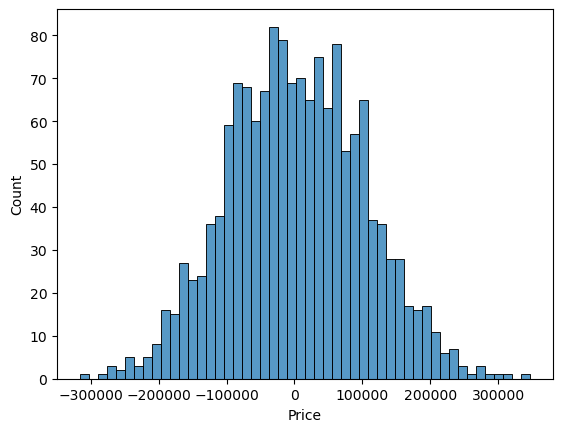

In [27]:
#Es importante revisar que los residuos presenten una distribución normal:
errores = y_test - y_pred
sns.histplot(errores, bins = 50)

In [28]:
#Utilicemos algunas métricas para evaluar nuestro modelo
from sklearn.metrics import *

In [29]:
np.sqrt(mean_squared_error(y_test,y_pred))

100341.52954485524

In [30]:
1 - np.sqrt(mean_squared_error(y_test,y_pred))/df['Price'].mean()

0.9185587560867482

In [31]:
r2_score(y_test,y_pred)

0.9146818498754001

In [32]:
#mis_datos = [[ingreso promedio,edad de la casa,salas,habitaciones,poblacion]]
mis_datos = [[100000,3,2,3,20000]]

model.predict(mis_datos)

C:\Users\jeanp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([571748.12668611])

In [33]:
print("Precio aproximado: {:,.2f}".format(model.predict(mis_datos)[0]))

Precio aproximado: 571,748.13


C:\Users\jeanp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
